This notebook contains the code needed to process the data which tracks the POIS and diversity, as generated by 'generate_POIS.ipynb'
This code is part of the paper "The Importance of Being Restrained" DETAILS + CITATION INFO TO ADD HERE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import pickle as pkl

log_folder_location = "logs_dict" #where to find the processed logs
sdiss = ['COTN', 'mirror', 'saturate', 'toroidal', 'unif_resample']
# sdiss = ['c', 'm', 's', 't', 'u', 'h']

In [2]:
font = {'size'   : 30}

plt.rc('font', **font)

In [14]:
def plot_running_pois(fid, iid = 1, dim = 5, de_version = 'lshade'):
    colors = sbs.color_palette('Set2', len(sdiss)+1)
    colors.pop(-2)
    plt.figure(figsize=(16,10))
    for sidx, sdis in enumerate(sdiss):
        show_label = True
        for rep in range(5):
            with open(f"{log_folder_location}/{de_version}_F{fid}_{dim}D_I{iid}_{sdis}_R{rep}.pkl", "rb") as f: 
                res = pkl.load(f)
            x = res['corrections']
#             x = np.load(f"logs_corr/per_run/F{fid}_{sdis}_I{iid}_R{rep}.npy")
            if show_label:
                plt.plot(range(len(x)),[v/c for c,v in enumerate(np.cumsum(x))], label=f'{sdis}', c=colors[sidx])
                show_label = False
            else:
                plt.plot(range(len(x)),[v/c for c,v in enumerate(np.cumsum(x))], c=colors[sidx])
            solved = np.where(np.array(res['fitness']) < 1e-8)[0]
            if len(solved) > 0:
                plt.axvline(np.sum(res['popsize'][:solved[0]]), color = colors[sidx], ls='--')
    # plt.plot(range(len(x2)),[v/c for c,v in enumerate(np.cumsum(x2))])
#     plt.axvline(49, c='k')
#     plt.axvline(99, c='k')
#     plt.xscale('log')
    plt.legend()
    plt.xlim(45,50000)
    plt.tight_layout()
    plt.savefig(f"Figures/F{fid}_I{iid}_{dim}D_{de_version}_running_pois.pdf")
    plt.close()
#     plt.show()

In [ ]:
for fid in range(1,25):
    plot_running_pois(fid, iid = 1, dim=5, de_version = 'shade')

In [2]:
def plot_sliding_window_pois(fid, iid = 1, dim = 5, de_version = 'lshade'):
    colors = sbs.color_palette('Set2', len(sdiss)+2) #plus 2 here, since 'h' was not used for these experiments
    colors.pop(-2)
    plt.figure(figsize=(16,10))
    for sidx, sdis in enumerate(sdiss):
        show_label = True
        for rep in range(5):
            with open(f"{log_folder_location}/{de_version}_F{fid}_{dim}D_I{iid}_{sdis}_R{rep}.pkl", "rb") as f: 
                res = pkl.load(f)
            x = res['corrections']
            y = res['popsize']
            if show_label:
                plt.plot(range(int(len(y)-10)),[np.sum(x[int(np.sum(y[:i])):int(np.sum(y[:i+10]))])/np.sum(y[i:i+10]) for i in range(len(y)-10)], label=f'{sdis}', c=colors[sidx])
                show_label = False
            else:
                plt.plot(range(int(len(y)-10)),[np.sum(x[int(np.sum(y[:i])):int(np.sum(y[:i+10]))])/np.sum(y[i:i+10]) for i in range(len(y)-10)], c=colors[sidx])
            solved = np.where(np.array(res['fitness']) < 1e-8)[0]
            if len(solved) > 0:
                plt.axvline(solved[0], color = colors[sidx], ls='--')
    # plt.plot(range(len(x2)),[v/c for c,v in enumerate(np.cumsum(x2))])
#     plt.axvline(49, c='k')
#     plt.axvline(99, c='k')
#     plt.xscale('log')
    plt.legend()
    plt.xlabel("Start Generation")
    plt.ylabel("Fraction of Corrections")
#     plt.xlim(45,50000)
    plt.tight_layout()
    plt.savefig(f"Figures/F{fid}_I{iid}_{dim}D_{de_version}_window_pois.pdf")
#     plt.close()
#     plt.show()

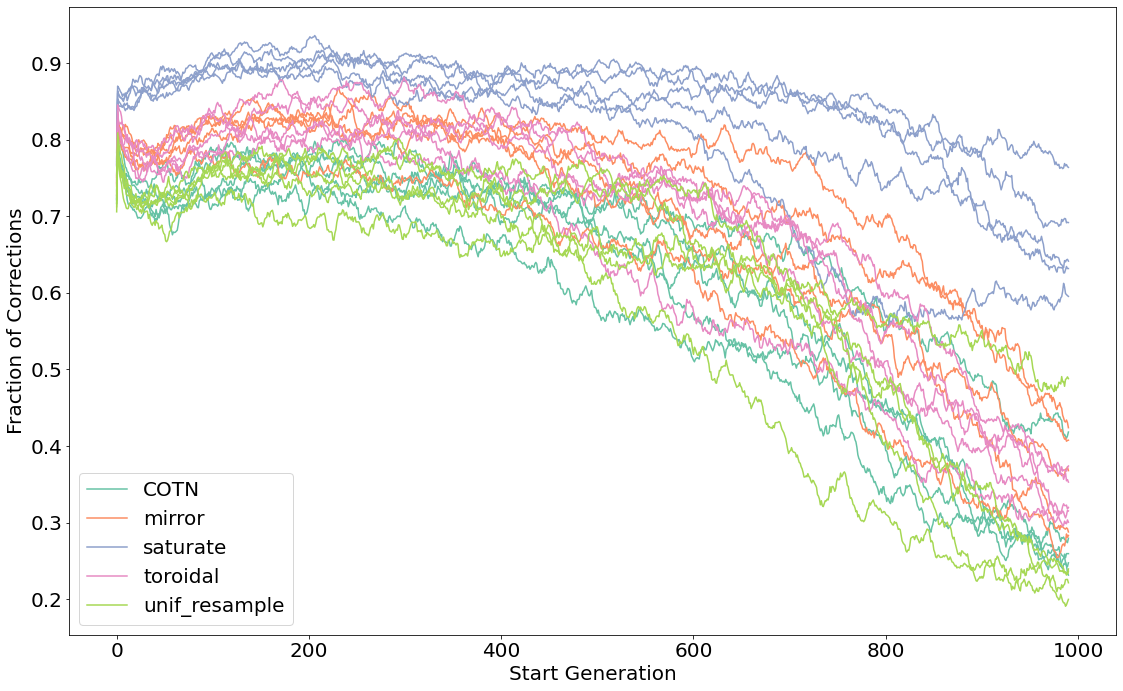

In [16]:
plot_sliding_window_pois(23, 1, dim=30, de_version='shade')

In [ ]:
for fid in range(1,25):
    plot_sliding_window_pois(fid, dim=5, de_version='lshade')

In [18]:
def plot_diversity(fid, iid = 1, dim = 5, de_version = 'lshade'):
    colors = sbs.color_palette('Set2', len(sdiss)+2)
    colors.pop(-2)
    plt.figure(figsize=(16,10))
    for sidx, sdis in enumerate(sdiss):
        show_label = True
        for rep in range(5):
            with open(f"{log_folder_location}/{de_version}_F{fid}_{dim}D_I{iid}_{sdis}_R{rep}.pkl", "rb") as f: 
                res = pkl.load(f)
            n_iters = len(res['popsize'])
            x = res['corrections']
            if show_label:
                plt.plot(range(n_iters),res['diversity'], label=f'{sdis}', c=colors[sidx])
                show_label = False
            else:
                plt.plot(range(n_iters),res['diversity'], c=colors[sidx])
            solved = np.where(np.array(res['fitness']) < 1e-8)[0]
            if len(solved) > 0:
                plt.axvline(solved[0], color = colors[sidx], ls='--')
    # plt.plot(range(len(x2)),[v/c for c,v in enumerate(np.cumsum(x2))])
#     plt.axvline(49, c='k')
#     plt.axvline(99, c='k')
    plt.yscale('log')
    plt.legend()
    plt.xlabel("Generation")
    plt.ylabel("Population Diversity")
#     plt.xlim(45,50000)
    plt.tight_layout()
    plt.savefig(f"Figures/F{fid}_I{iid}_{dim}D_{de_version}_diversity.pdf")
#     plt.close()
#     plt.show()

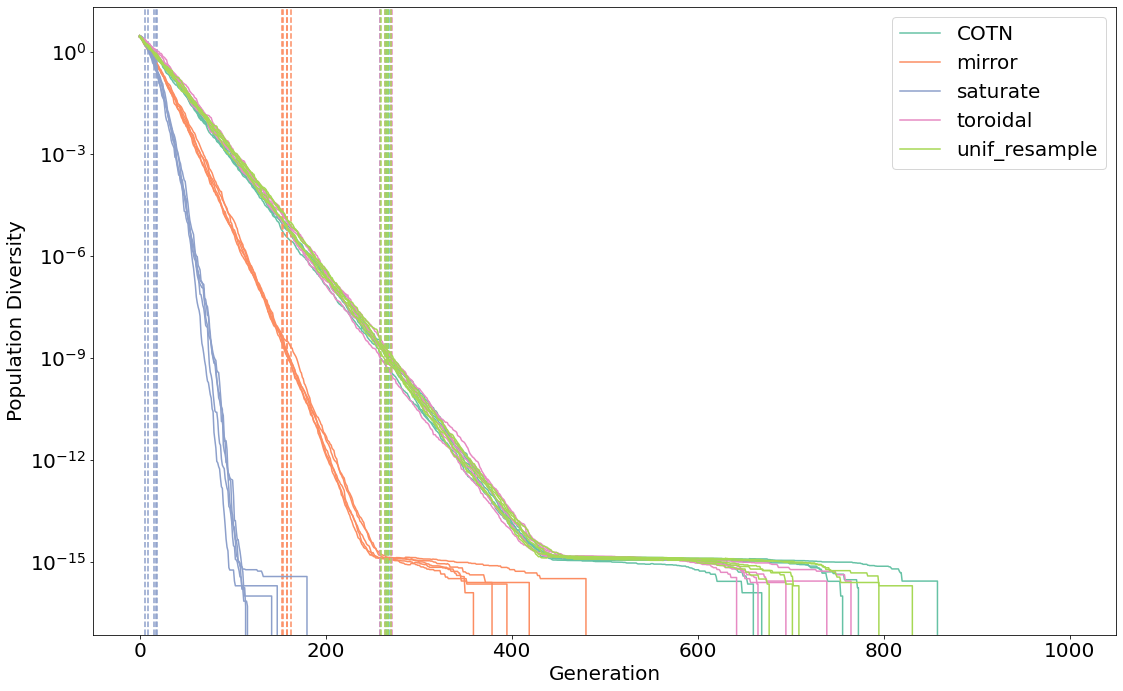

In [26]:
plot_diversity(5, 1, 5, de_version='shade')

In [ ]:
for fid in range(1,25):
    plot_diversity(fid, dim=5, de_version='shade')

In [6]:
sdiss_sorted = ['COTN', 'mirror', 'saturate', 'toroidal', 'unif_resample']

In [14]:
def plot_final_pois_heatmap(dim, de_version, iid):
    pois_array = np.zeros((24,len(sdiss)))
    for fid in range(1,25):
        for sidx, sdis in enumerate(sdiss_sorted):
            temp = 0
            for rep in range(5):
                with open(f"{log_folder_location}/{de_version}_F{fid}_{dim}D_I{iid}_{sdis}_R{rep}.pkl", "rb") as f: 
                    res = pkl.load(f)
                temp += np.sum(res['corrections'])/len(res['corrections'])
            pois_array[fid-1, sidx] = temp/5
    
    plt.figure(figsize=(20,8))
    sbs.heatmap(np.transpose(pois_array), cmap='viridis', vmax=1)
    plt.yticks([i+0.5 for i in range(5)], sdiss_sorted, rotation=45)
    plt.xticks([i+0.5 for i in range(24)], range(1,25),rotation=0)
    plt.xlabel("Function ID")
    plt.ylabel("SDIS")
    plt.tight_layout()
    plt.savefig(f"Figures/Final_POIS_{dim}D_{de_version}_I{iid}.pdf")
    plt.show()

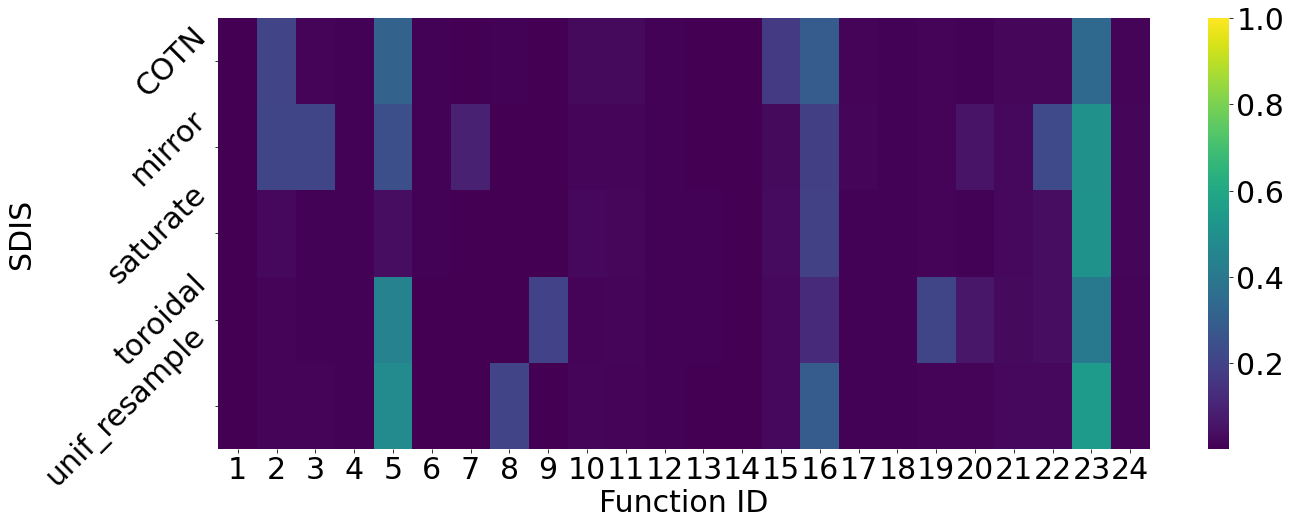

In [15]:
plot_final_pois_heatmap(5, 'lshade', 1)

In [4]:
def plot_final_pois_heatmap_all_iid(dim, de_version):
    pois_array = np.zeros((24,len(sdiss)))
    for fid in range(1,25):
        for sidx, sdis in enumerate(sdiss_sorted):
            temp = 0
            for iid in range(1,6):
                for rep in range(5):
                    with open(f"{log_folder_location}/{de_version}_F{fid}_{dim}D_I{iid}_{sdis}_R{rep}.pkl", "rb") as f: 
                        res = pkl.load(f)
                    temp += np.sum(res['corrections'])/len(res['corrections'])
            pois_array[fid-1, sidx] = temp/25
    
    plt.figure(figsize=(20,8))
    sbs.heatmap(np.transpose(pois_array), cmap='viridis', vmax=1)
    plt.yticks([i+0.5 for i in range(5)], sdiss_sorted, rotation=45)
    plt.xticks([i+0.5 for i in range(24)], range(1,25))
    plt.xlabel("Function ID")
    plt.ylabel("SDIS")
    plt.tight_layout()
    plt.savefig(f"Figures/Final_POIS_{dim}D_{de_version}_IAll.pdf")
    plt.show()

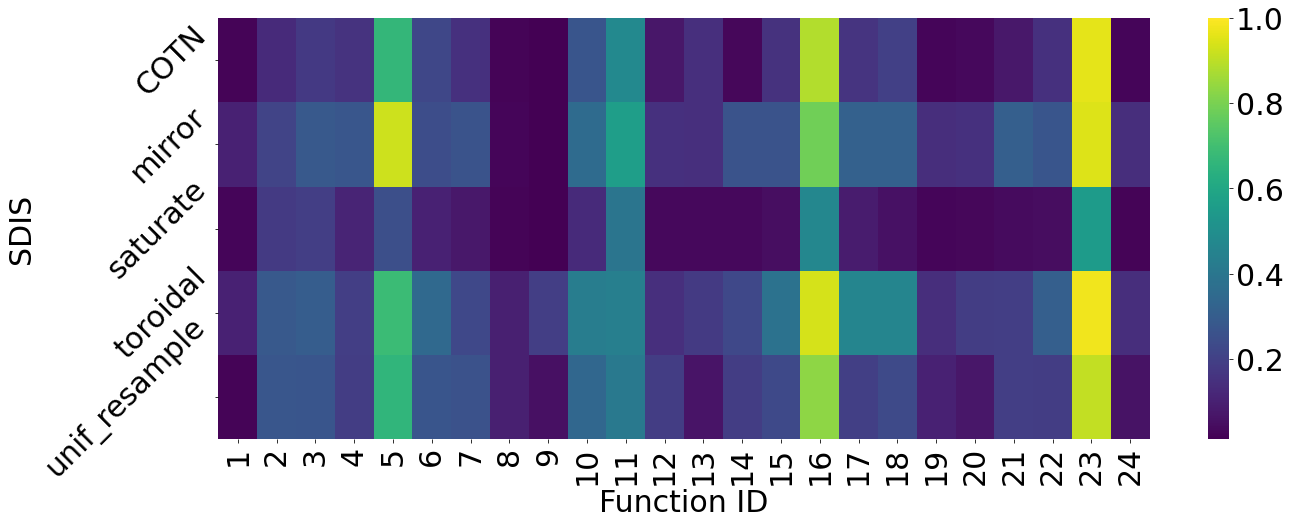

In [8]:
plot_final_pois_heatmap_all_iid(30, 'lshade')